<a href="https://colab.research.google.com/github/LeeTunMT/python/blob/main/DS2024_Lab4_22280083_LeTuanMinhThanh_unfix_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/LeeTunMT/python/main/College.csv')

In [3]:
data


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [4]:
# Delete 2 columns with a string data type
data.drop(columns=data.columns[[0,1]], axis=1,  inplace=True)

In [5]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
# Explore the dataset to understand its structure, feature types, and basic statistics
print("Dataset structure:")
print(data.info())

print("\nBasic statistics:")
print(data.describe())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB
None

Basic statistics:
 

In [7]:
#check missing values
data.isna().any()*100

Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

-> This dataset has no missing values

## Scale the data



In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
X_scl = scaler.transform(data)

In [9]:
X_scl

array([[0.03288693, 0.04417701, 0.10791254, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [0.04384229, 0.07053089, 0.07503539, ..., 0.25      , 0.13838671,
        0.42592593],
       [0.0280549 , 0.03903572, 0.04734938, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [0.04198863, 0.07018813, 0.10382256, ..., 0.3125    , 0.09683865,
        0.36111111],
       [0.22127341, 0.09067713, 0.20166745, ..., 0.765625  , 0.70126492,
        0.82407407],
       [0.06056693, 0.06790312, 0.10319333, ..., 0.4375    , 0.02494015,
        0.82407407]])

X_scl now is an numpy array. I will snippet converts the numpy array X_scl into a pandas DataFrame X_scl, which then allows you to use the apply method as intended

In [10]:
X_scl = pd.DataFrame(X_scl)

In [11]:
X_scl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


# Implement the KMeans clustering algorithm from scratch using Numpy:

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin

class KMeans:
    def __init__(self, con_tol=1e-4, max_iter=10000):
        self.n_clusters = n_clusters
        self.con_tol = con_tol
        self.max_iter = max_iter

        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = 0
        self.inertia_ = 0

    def ramdom_centroids(data, k):
      centroids = []
      for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
      return pd.concat(centroids, axis = 1)


    def fit(self, X):
      # init centroids
      self.cluster_centers_ = self.__initialize_centroids(X)
      prev_centroids = np.zeros((self.K, X.shape[1]))
      # training
      while True:
          # compute distances from X_i to centroids
          distances = distance.cdist(X, self.cluster_centers_) # shape: (N, K)
          # assign new labels
          self.labels_ = np.argmin(distances, axis = 1)
          # check convergence
          if (self.__compute_dist_percent(prev_centroids) <= self.conv_tol) or self.n_iters_ >= self.max_iter:
              break
          prev_centroids = self.cluster_centers_
          self.cluster_centers_ = self.__update_centroids(X)
          # increase iteration count
          self.n_iters_ += 1
      self.wcv_ = self.__compute_wcv(X)
      return self

    def predict(self, X):
        return pairwise_distances_argmin(X, self.cluster_centers_)

    def transform(self, X):
        return np.min(pairwise_distances(X, self.cluster_centers_), axis=1)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)


In [13]:
def ramdom_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis = 1)

In [53]:
centroids = ramdom_centroids(X_scl, 4)

<ipython-input-13-8510c981a814>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [54]:
centroids

,0,1,2,3
0,0.015163,0.037011,0.010810,0.085623
1,0.012606,0.044596,0.017747,0.023460
2,0.026585,0.028315,0.032248,0.089036
3,0.368421,0.273684,0.273684,0.526316
4,0.230769,0.395604,0.351648,0.340659
5,0.641728,0.050787,0.038281,0.016347
6,0.001466,0.005954,0.059492,0.009526
7,0.612087,0.423295,0.442149,0.509298
8,0.093001,0.200504,0.589533,0.561160
9,0.278075,0.135472,0.135472,0.157754


In [55]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((X_scl - x) ** 2).sum(axis = 1)))
  return distances.idxmin(axis = 1)

In [56]:
labels = get_labels(X_scl, centroids)

In [57]:
labels.value_counts()

1    364
3    260
2    137
0     16
Name: count, dtype: int64

In [58]:
def new_centroids(data, labels, k):
    centroids = X_scl.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [60]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X_scl)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

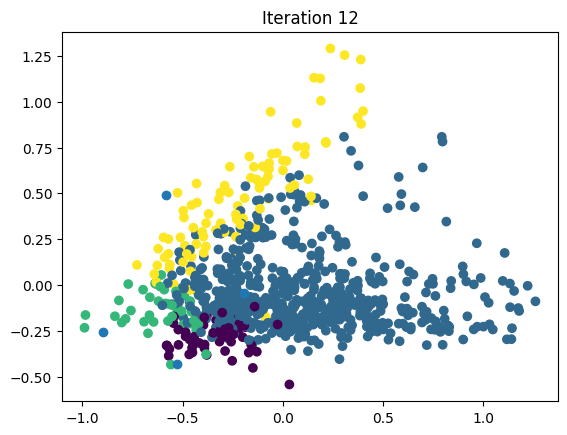

In [62]:
max_iterations = 10000
centroid_count = 4

centroids = ramdom_centroids(X_scl, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(X_scl, centroids)
    centroids = new_centroids(X_scl, labels, centroid_count)
    plot_clusters(X_scl, labels, centroids, iteration)
    iteration += 1

## Creating the scree plot for Intertia - elbow method


In [ ]:
no_of_clusters = range(1, math.floor(math.sqrt(X_scl.shape[0])))
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_scl)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

Text(0.5, 1.0, 'Inertia Plot per k')

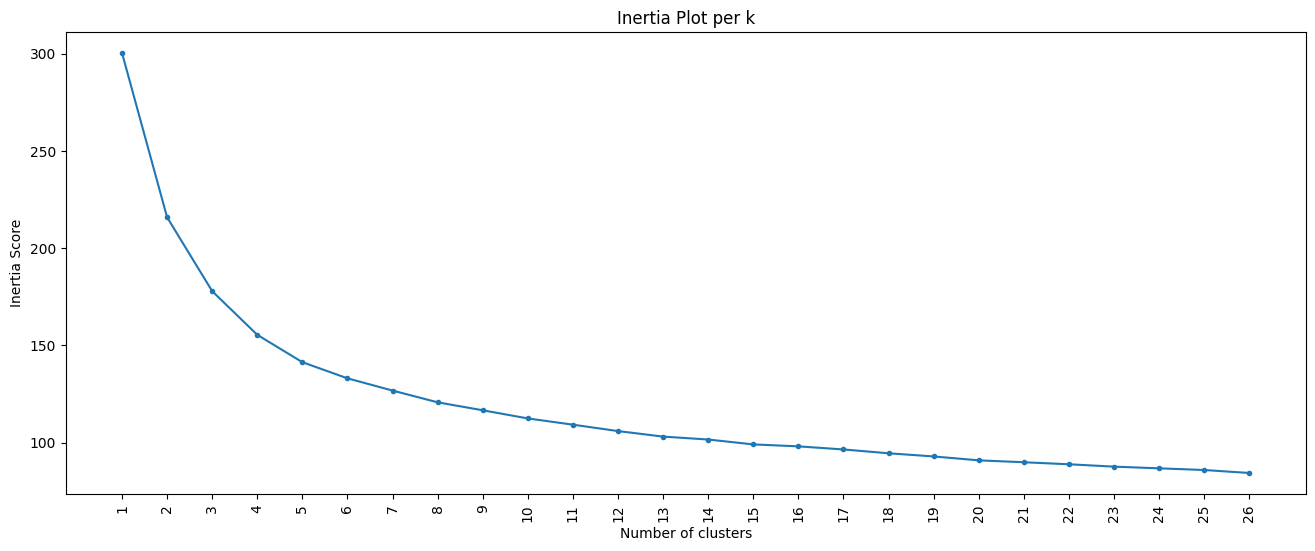

In [35]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia, marker = '.', linestyle = '-')
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

With the chart above using the elbow method, we can see that 5 centroids is optimal for K-Means

## Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, math.floor(math.sqrt(X_scl.shape[0])))
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scl)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_scl, cluster_labels))


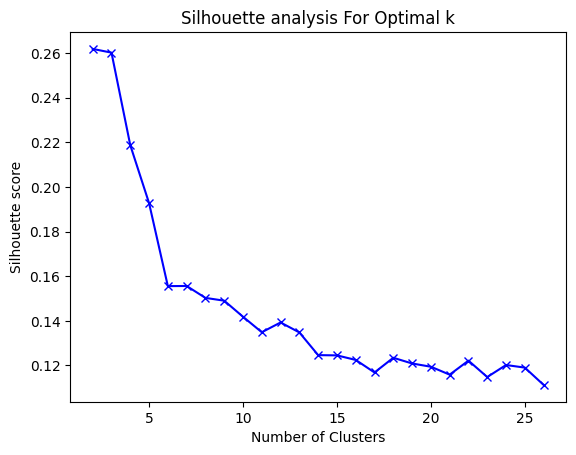

In [48]:

# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

Text(0.5, 1.0, 'Silhouette Scores for Various Numbers of Clusters')

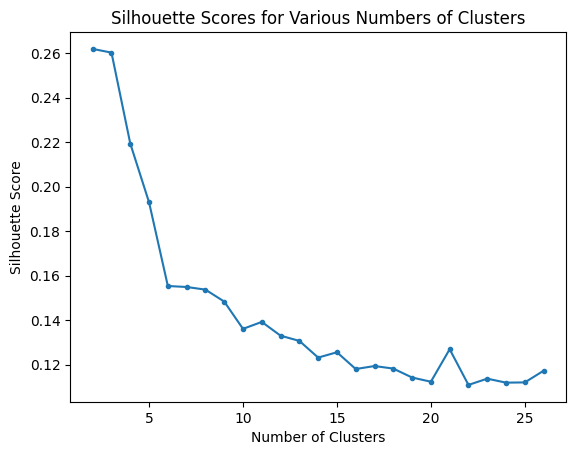

In [41]:
plt.plot(cluster_list, sil_score, marker = '.', linestyle = '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')

# Testing and Validation:

In [49]:
centroids

,0,1,2
0,0.024413,0.000000,0.009712
1,0.034088,0.000000,0.013705
2,0.057657,0.084550,0.000000
3,0.000000,0.343615,0.000000
4,0.359155,0.626892,0.000000
5,0.051407,0.000000,0.018973
6,0.016873,0.000000,0.008036
7,0.306343,0.000000,0.332692
8,0.000000,0.450990,0.346329
9,0.000000,0.208223,0.212521


In [50]:
km = KMeans(4)
km.fit(X_scl)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [51]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

In [52]:
pd.DataFrame(km.cluster_centers_, columns=data.columns).T

,0,1,2,3
Apps,0.160643,0.036334,0.121426,0.025096
Accept,0.205944,0.049028,0.108722,0.033509
Enroll,0.355555,0.066175,0.151755,0.056318
Top10perc,0.252028,0.316151,0.656059,0.153815
Top25perc,0.543055,0.584515,0.871710,0.342700
F.Undergrad,0.381197,0.054647,0.126809,0.052428
P.Undergrad,0.132056,0.018183,0.014867,0.026863
Outstate,0.251589,0.520548,0.767326,0.299829
Room.Board,0.329835,0.471102,0.606867,0.325182
Books,0.216680,0.199001,0.222775,0.193011


## Test my custom KMeans class implementation on the provided dataset.